In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

# EDA and Data cleaning

### Імпорт даних

In [35]:
file_names = ['Bronx.xlsx', 'Brooklyn.xlsx', 'Manhattan.xlsx', 'Queens.xlsx', 'Statenisland.xlsx']

data_frames = []

for file_name in file_names:
    df = pd.read_excel(file_name)
    
    df['District'] = os.path.splitext(file_name)[0]
    
    data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)

df= merged_df
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,District
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,0.0,1.0,1842.0,2048.0,1901.0,1,A1,655000,2022-11-01,Bronx
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,0.0,1.0,1646.0,1497.0,1899.0,1,A1,215000,2023-04-18,Bronx
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,0.0,1.0,1646.0,1497.0,1899.0,1,A1,570000,2023-08-23,Bronx
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,0.0,1.0,1782.0,1548.0,1899.0,1,A1,0,2023-04-14,Bronx
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,0.0,2.0,1658.0,1428.0,1901.0,1,B9,350000,2023-06-26,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73300,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,NaN,A1,N/A LENEVAR AVENUE,NaN,...,0.0,1.0,2603.0,0.0,2022.0,1,V0,1116638,2022-12-19,Statenisland
73301,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,NaN,A1,N/A LENEVAR AVENUE,NaN,...,0.0,1.0,2551.0,0.0,NaN,1,V0,1116638,2022-12-19,Statenisland
73302,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,...,0.0,0.0,2597.0,0.0,2023.0,1,V0,1116638,2022-12-19,Statenisland
73303,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,...,0.0,0.0,2644.0,0.0,2023.0,1,V0,1116638,2022-12-19,Statenisland


### Перевірка наявності порожніх значень

In [36]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
EASEMENT                          73305
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
APARTMENT NUMBER                  55608
ZIP CODE                              5
RESIDENTIAL UNITS                 17833
COMMERCIAL UNITS                  31037
TOTAL UNITS                       15504
LAND SQUARE FEET                  33366
GROSS SQUARE FEET                 33366
YEAR BUILT                         4875
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
District                              0
dtype: int64

### Інтерполяція та заміна порожніх значень

In [38]:
numeric_columns = [ 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
                    'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']

df[numeric_columns] = df[numeric_columns].interpolate()

text_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
                'EASEMENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'SALE DATE']
df[text_columns] = df[text_columns].replace(np.nan, 'No Info', regex=True)
df['ZIP CODE']=df['ZIP CODE'].replace(np.nan, 0, regex=True)
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASEMENT                          0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
District                          0
dtype: int64

### Перевіряємо чи всі дати в колонці SALE DATE відформатовані правильно

In [39]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

errors = df['SALE DATE'][df['SALE DATE'].isnull()]

print(errors)

Series([], Name: SALE DATE, dtype: datetime64[ns])


### Перевіряємо типи даних в колонках

In [40]:
print(df.dtypes)

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASEMENT                                  object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

### Видаляємо рядки з нульовими значеннями SALE PRICE

In [41]:
zero_price_count = (df['SALE PRICE'] == 0).sum()
print(f"Кількість рядків з 'SALE PRICE' рівним 0: {zero_price_count}")
df = df[df['SALE PRICE'] != 0]
zero_price_count = (df['SALE PRICE'] == 0).sum()
print(f"Кількість рядків з 'SALE PRICE' рівним 0: {zero_price_count}")

Кількість рядків з 'SALE PRICE' рівним 0: 23210
Кількість рядків з 'SALE PRICE' рівним 0: 0


### Перевіряємо дані на вкиди

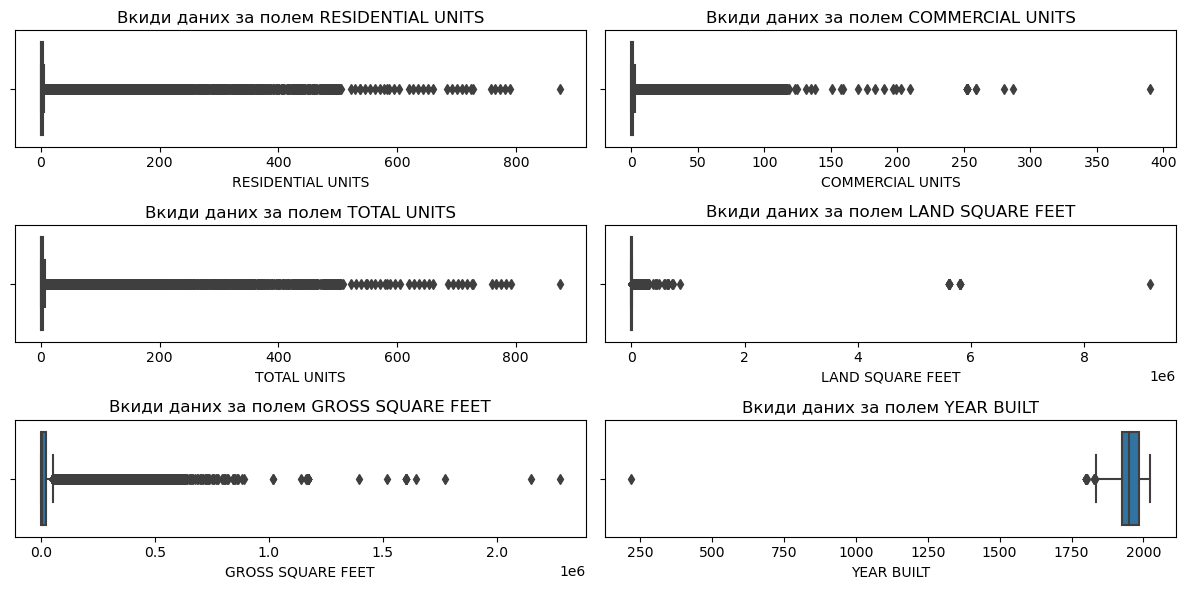

In [42]:
numeric_columns = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
                    'GROSS SQUARE FEET', 'YEAR BUILT']

rows = len(numeric_columns) // 2
columns = 2

fig, axes = plt.subplots(rows, columns, figsize=(12, 2 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    if i < len(axes):  
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Вкиди даних за полем {column}')

plt.tight_layout()

plt.show()

### Видалення рядків, де рік побудови менший за рік заснування Нью-Йорку

In [43]:
# 
df = df.loc[df['YEAR BUILT'] >= 1624]
df.loc[df['RESIDENTIAL UNITS'] >= 800]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,District
352,2,BAYCHESTER,10 COOPS - ELEVATOR APARTMENTS,2,5259,16,No Info,D4,"34-10 DEREIMER AVENUE, 5I",No Info,...,0.428571,873.857143,861038.142857,882508.0,1965.0,2,D4,165000,2023-06-30,Bronx


In [44]:
df=df.loc[df['RESIDENTIAL UNITS'] <= 800]

### Видалення рядків з порожньою ціною
Джерело даних повідомляє про те, що рядки з нульовою ціною містять дані про передачу нерухомості в якості спадку чи подарунку. Тому не варто враховувати їх в загальну статистику.

In [45]:
count_zero = (df['LAND SQUARE FEET'] == 0).sum()

print("Кількість рядків, де LAND SQUARE FEET = 0 :", count_zero)
df = df[df['LAND SQUARE FEET'] != 0]
count_zero = (df['LAND SQUARE FEET'] == 0).sum()

print("Кількість рядків, де LAND SQUARE FEET = 0 :", count_zero)

Кількість рядків, де LAND SQUARE FEET = 0 : 15
Кількість рядків, де LAND SQUARE FEET = 0 : 0


### Перевіряємо дані на вкиди після очистки

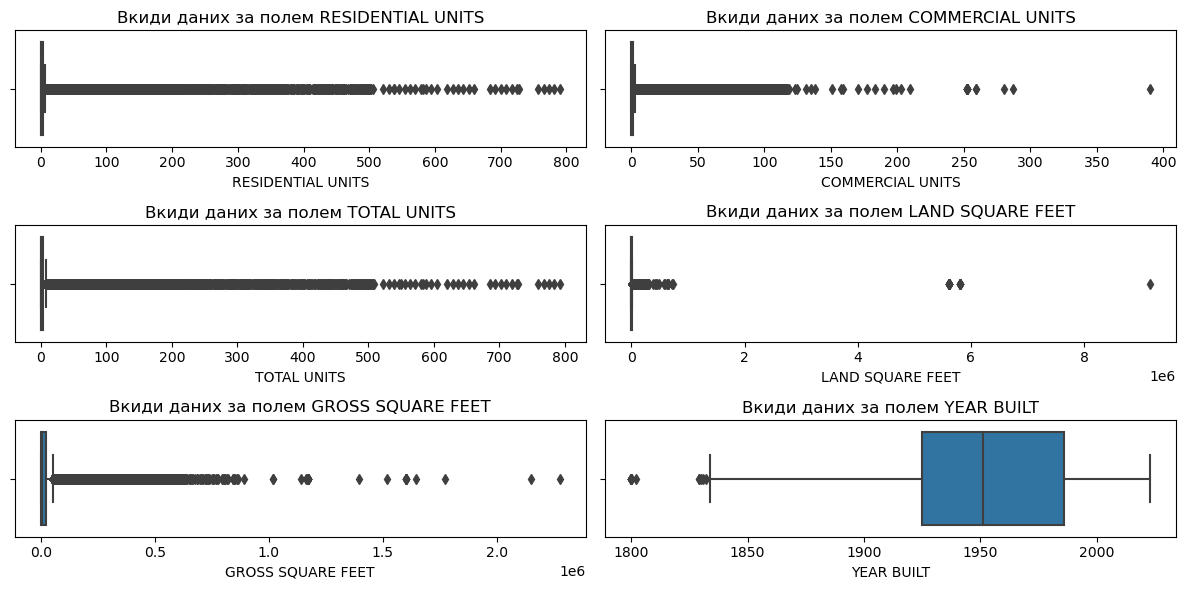

In [46]:
numeric_columns = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
                    'GROSS SQUARE FEET', 'YEAR BUILT']

rows = len(numeric_columns) // 2
columns = 2

fig, axes = plt.subplots(rows, columns, figsize=(12, 2 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    if i < len(axes):  
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Вкиди даних за полем {column}')

plt.tight_layout()

plt.show()

# Data visualization

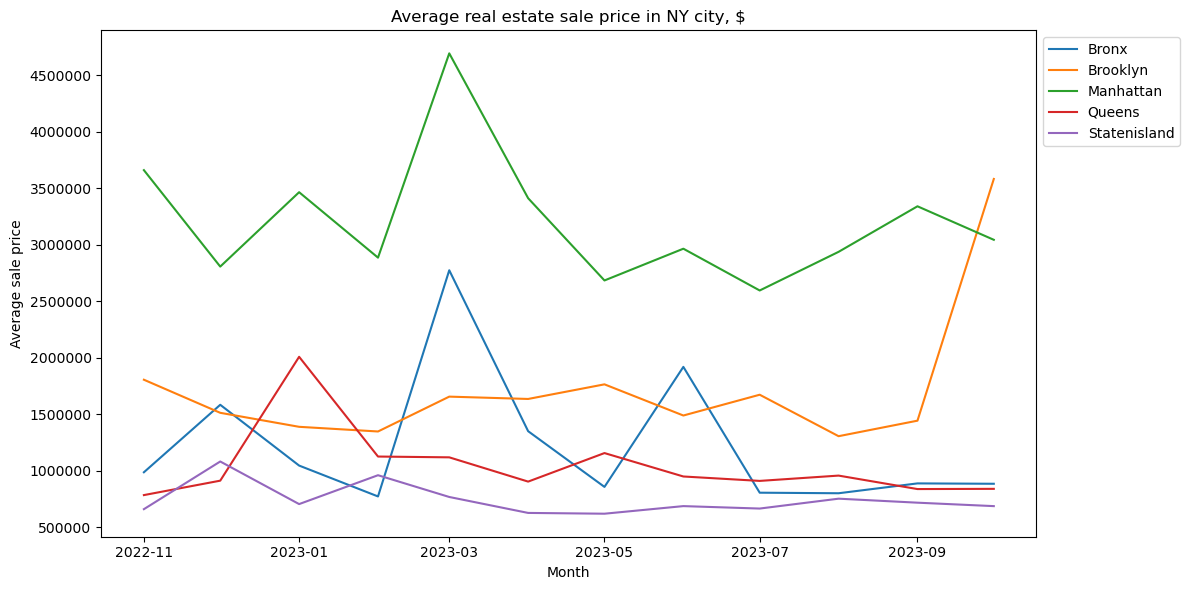

In [65]:
df['YearMonth'] = df['SALE DATE'].dt.to_period('M')


grouped_data = df.groupby(['District', 'YearMonth'])['SALE PRICE'].mean().reset_index()
# print(grouped_data)

plt.figure(figsize=(12, 6))
for district in grouped_data['District'].unique():
    subset = grouped_data[grouped_data['District'] == district]
    plt.plot(subset['YearMonth'].dt.to_timestamp(), subset['SALE PRICE'], label=f'{district}')

plt.title('Average real estate sale price in NY city, $')
plt.xlabel('Month')
plt.ylabel('Average sale price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

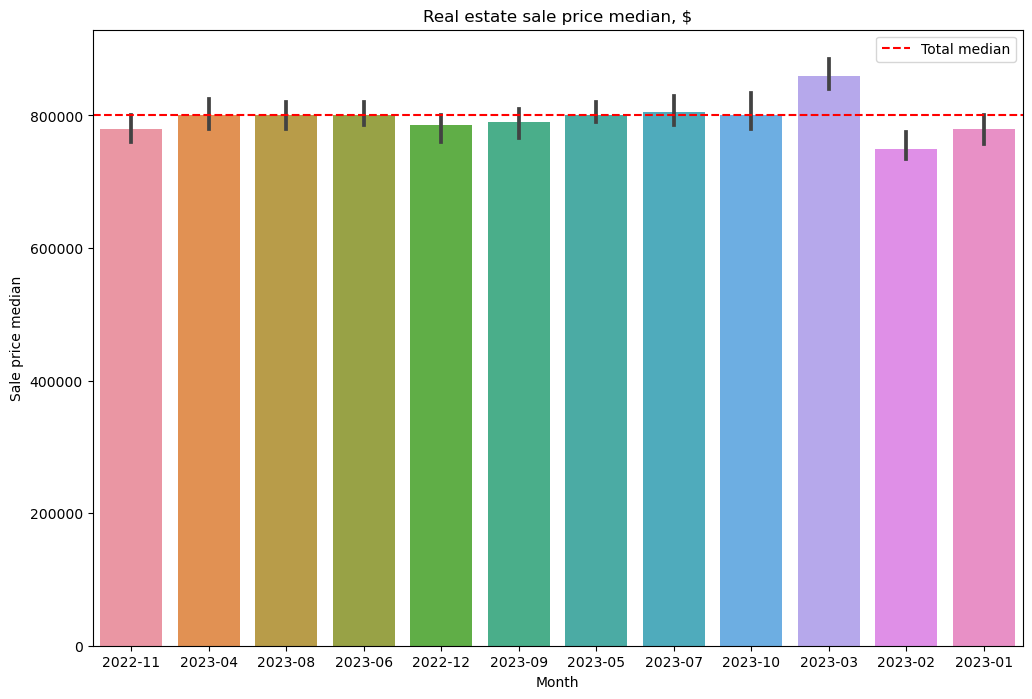

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x='YearMonth', y='SALE PRICE', data=df, estimator=np.median)
plt.title('Real estate sale price median, $')
plt.xlabel('Month')
plt.ylabel('Sale price median')
overall_median = df['SALE PRICE'].median()
plt.axhline(y=overall_median, color='r', linestyle='--', label='Total median')
plt.legend()
plt.show()

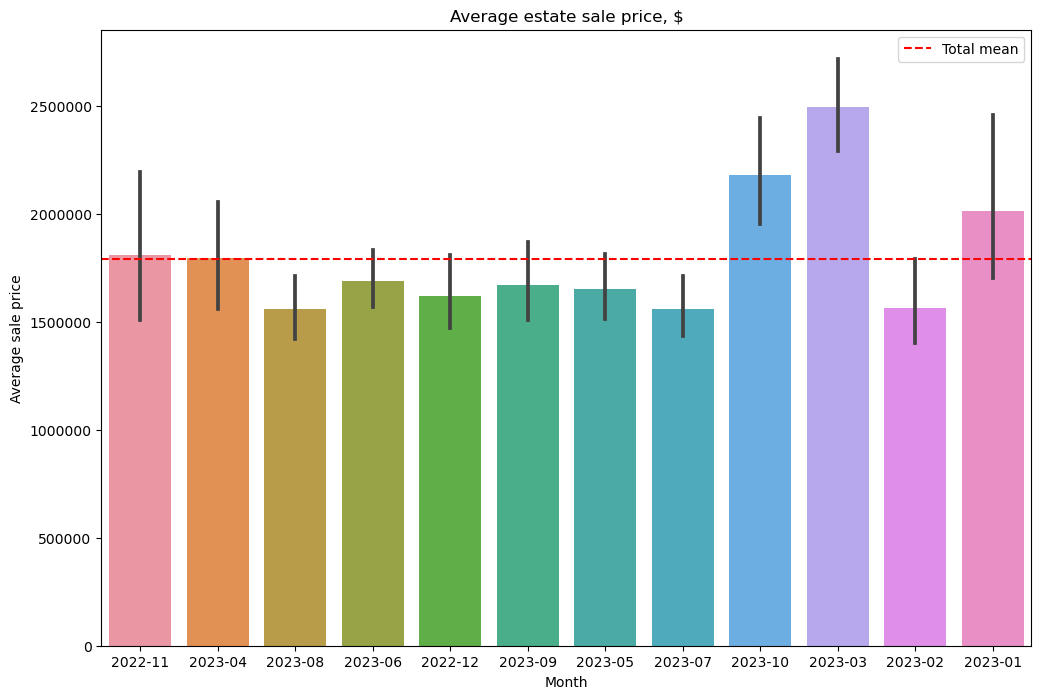

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x='YearMonth', y='SALE PRICE', data=df, estimator=np.mean)
plt.title('Average estate sale price, $')
plt.xlabel('Month')
plt.ylabel('Average sale price')
plt.ticklabel_format(style='plain', axis='y')
overall_mean = df['SALE PRICE'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--', label='Total mean')
plt.legend()
plt.show()

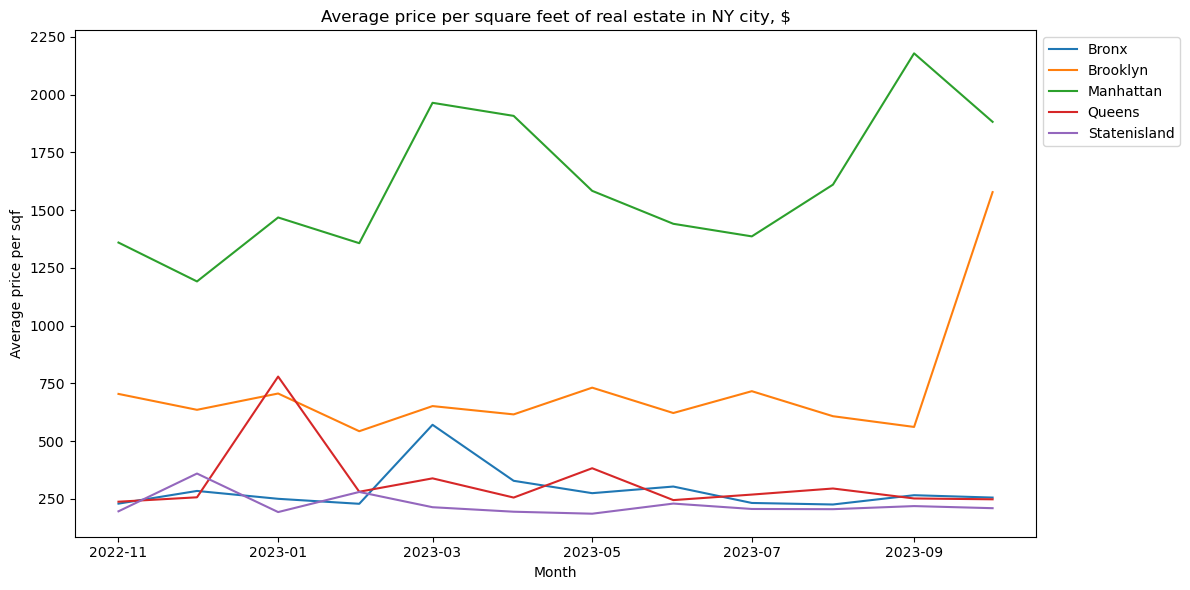

In [78]:
df['price_per_sqf'] = df['SALE PRICE'] / df['LAND SQUARE FEET']

grouped_data = df.groupby(['District', 'YearMonth'])['price_per_sqf'].mean().reset_index()

plt.figure(figsize=(12, 6))
for district in grouped_data['District'].unique():
    subset = grouped_data[grouped_data['District'] == district]
    plt.plot(subset['YearMonth'].dt.to_timestamp(), subset['price_per_sqf'], label=f'{district}')

plt.title('Average price per square feet of real estate in NY city, $')
plt.xlabel('Month')
plt.ylabel('Average price per sqf')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [49]:
grouped_data = df.groupby(['District', 'NEIGHBORHOOD'])['price_per_sqf'].mean().reset_index()
grouped_data_sorted = grouped_data.sort_values(by='price_per_sqf', ascending=False)
grouped_data_sorted.head(10)

,District,NEIGHBORHOOD,price_per_sqf
121,Manhattan,MIDTOWN WEST,6369.104702
98,Manhattan,CHELSEA,5328.492588
104,Manhattan,FINANCIAL,4577.146215
111,Manhattan,HARLEM-UPPER,4377.746131
45,Brooklyn,BROOKLYN HEIGHTS,3925.396614
122,Manhattan,MORNINGSIDE HEIGHTS,3528.476703
101,Manhattan,CLINTON,3450.959097
110,Manhattan,HARLEM-EAST,2675.141261
93,Brooklyn,WILLIAMSBURG-NORTH,2586.100938
239,Statenisland,ROSSVILLE-RICHMOND VALLEY,2204.866821


In [79]:
grouped_data = df.groupby(['District', 'NEIGHBORHOOD'])['price_per_sqf'].mean().reset_index()
grouped_data_sorted = grouped_data.sort_values(by='price_per_sqf', ascending=True)
grouped_data_sorted.head(10)

,District,NEIGHBORHOOD,price_per_sqf
32,Bronx,VAN CORTLANDT PARK,4.468453
89,Brooklyn,SPRING CREEK,32.052472
159,Queens,GLEN OAKS,50.922189
238,Statenisland,ROSSVILLE-PORT MOBIL,66.445967
215,Statenisland,GRYMES HILL,75.920643
172,Queens,KEW GARDENS,88.470237
24,Bronx,PARKCHESTER,89.617521
165,Queens,HOLLISWOOD,90.624057
8,Bronx,CITY ISLAND-PELHAM STRIP,94.017094
234,Statenisland,RICHMONDTOWN-LIGHTHS HILL,98.044798


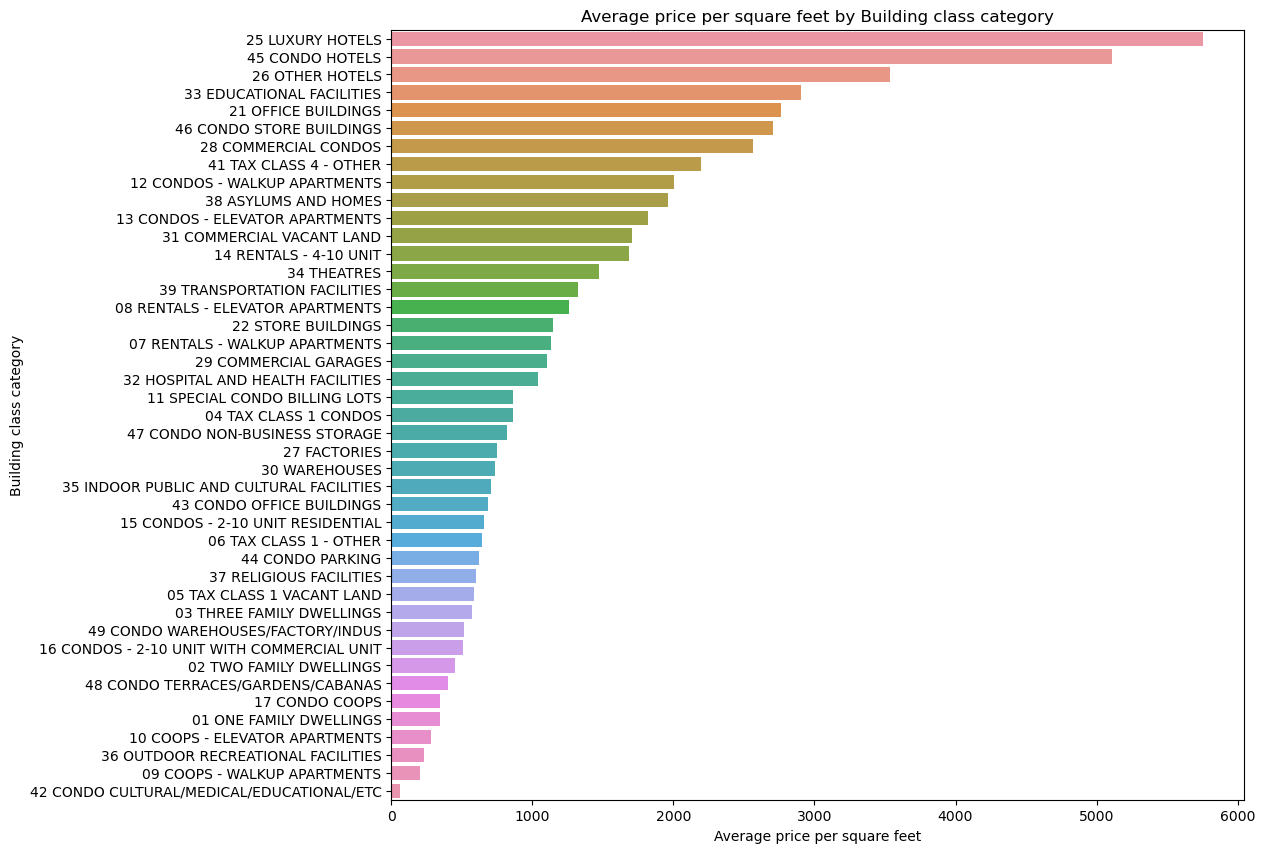

In [80]:
grouped_data_building_class = df.groupby('BUILDING CLASS CATEGORY')['price_per_sqf'].mean().reset_index()

grouped_data_building_class_sorted = grouped_data_building_class.sort_values(by='price_per_sqf', ascending=False)

plt.figure(figsize=(11, 10))
sns.barplot(x='price_per_sqf', y='BUILDING CLASS CATEGORY', data=grouped_data_building_class_sorted)
plt.title('Average price per square feet by Building class category')
plt.xlabel('Average price per square feet')
plt.ylabel('Building class category')
plt.show()

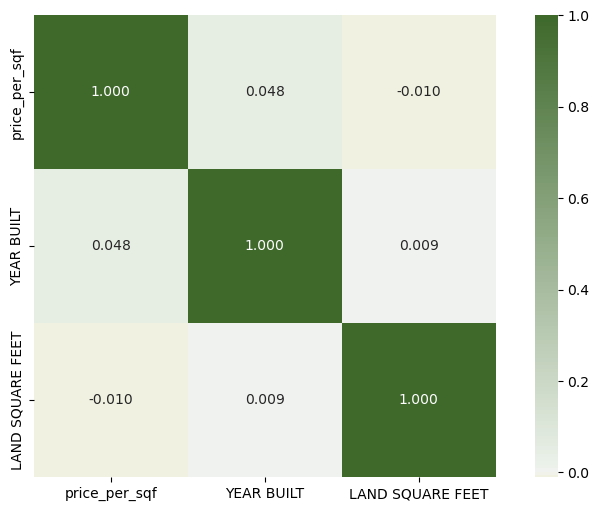

In [51]:
dataset1 = df[['price_per_sqf', 'YEAR BUILT', 'LAND SQUARE FEET']].copy()
dataset2 = dataset1.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(450, 120, s=75, l=40, n=9, center="light", as_cmap=True)
_ = sns.heatmap(dataset2, center=0, annot=True, fmt='.3f', square=True, cmap=cmap)


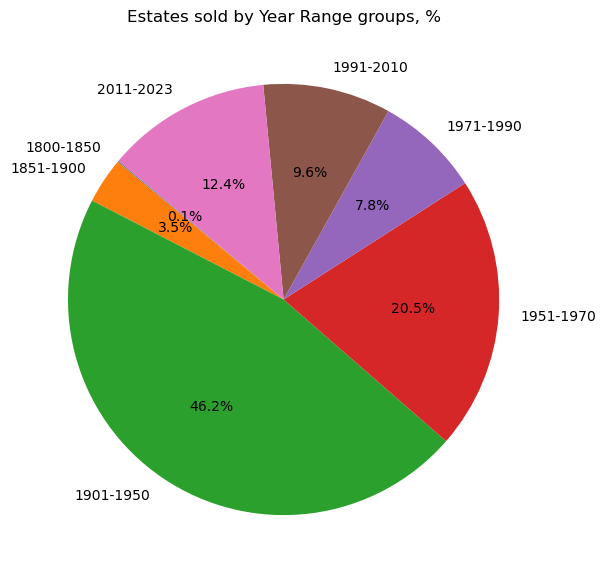

In [87]:

bins = [1800, 1851, 1900, 1950, 1970, 1990, 2010, 2023]  # Границі діапазонів
labels = ['1800-1850', '1851-1900','1901-1950', '1951-1970', '1971-1990', '1991-2010', '2011-2023']
df['Year Range'] = pd.cut(df['YEAR BUILT'], bins=bins, labels=labels)

grouped_year_range = df.groupby('Year Range').size().reset_index(name='Count')


plt.figure(figsize=(7, 7))
plt.pie(grouped_year_range['Count'], labels=grouped_year_range['Year Range'], autopct='%1.1f%%', startangle=140)
plt.title('Estates sold by Year Range groups, %')
plt.show()

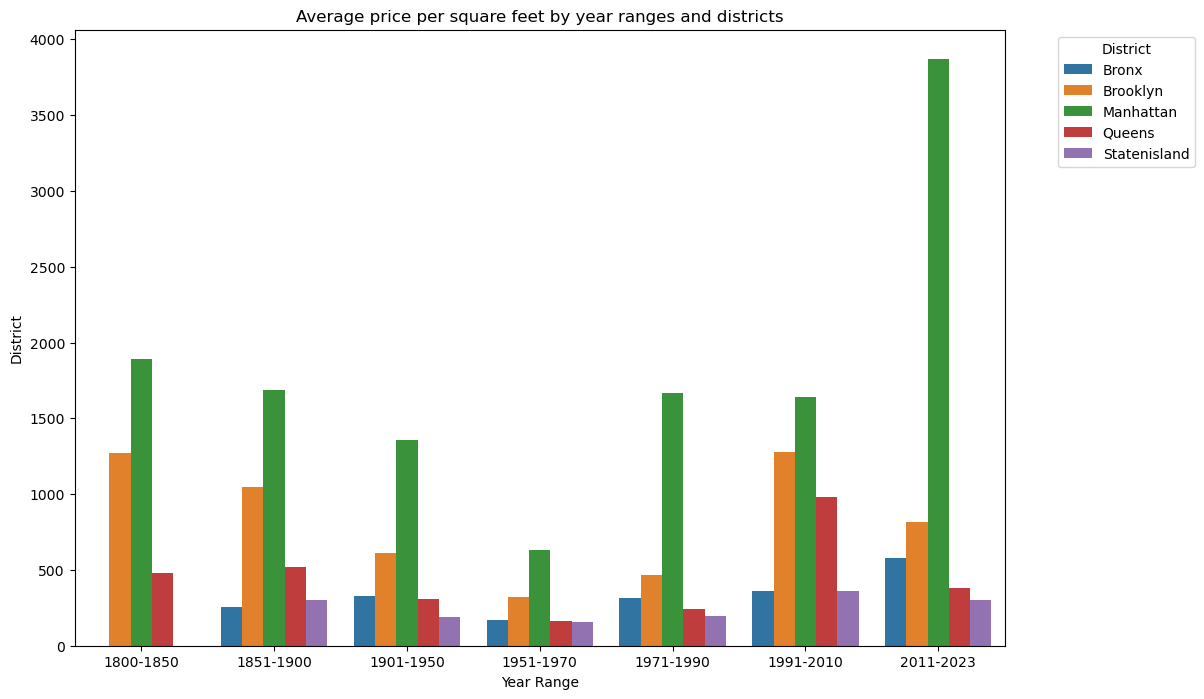

In [53]:
grouped_data = df.groupby(['Year Range', 'District'])['price_per_sqf'].mean().reset_index()
# print(grouped_data)

plt.figure(figsize=(12, 8))
sns.barplot(x='Year Range', y='price_per_sqf', hue='District', data=grouped_data)
plt.title('Average price per square feet by year ranges and districts')
plt.xlabel('Year Range')
plt.ylabel('District')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

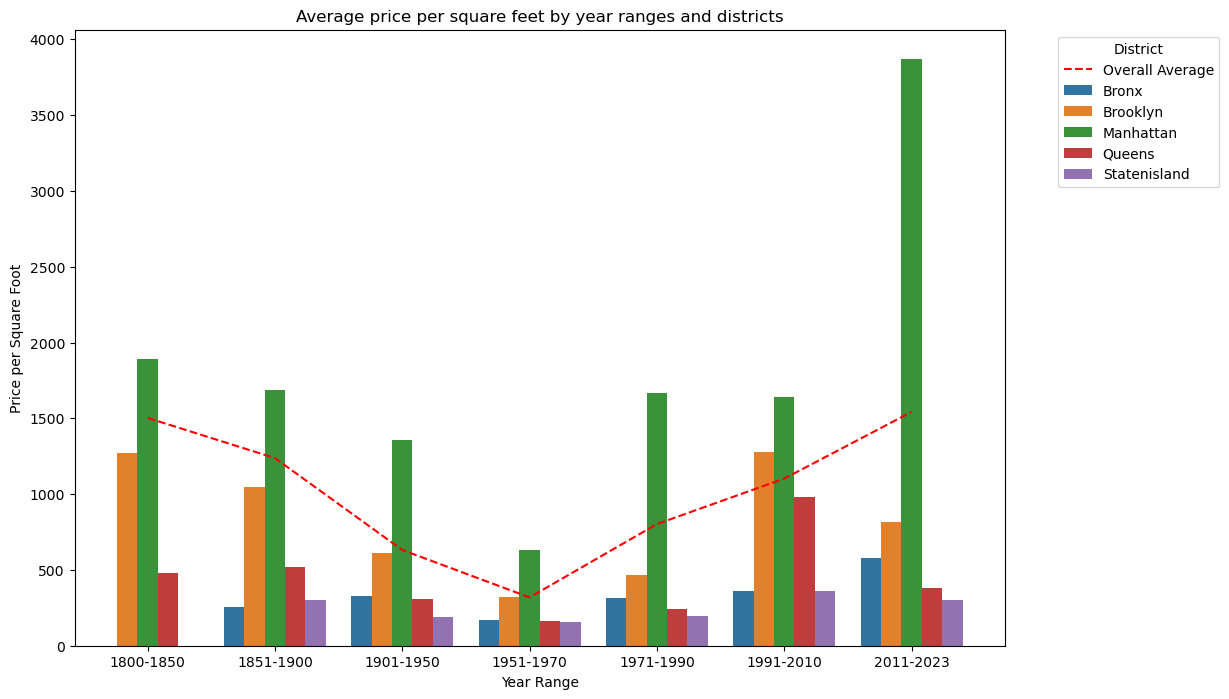

In [92]:
grouped_data = df.groupby(['Year Range', 'District'])['price_per_sqf'].mean().reset_index()

overall_average = df['price_per_sqf'].mean()

overall_average_by_year = df.groupby('Year Range')['price_per_sqf'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Year Range', y='price_per_sqf', hue='District', data=grouped_data)
plt.plot(overall_average_by_year['Year Range'], overall_average_by_year['price_per_sqf'], color='red', linestyle='--', label='Overall Average')
plt.title('Average price per square feet by year ranges and districts')
plt.xlabel('Year Range')
plt.ylabel('Price per Square Foot')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()